<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-01 15:01:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-01 15:01:44 (10.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


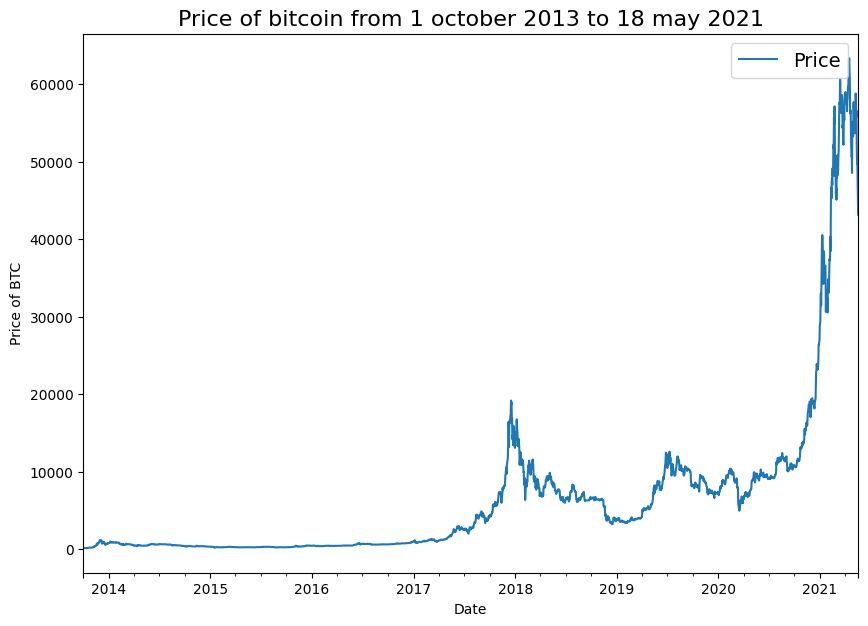

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

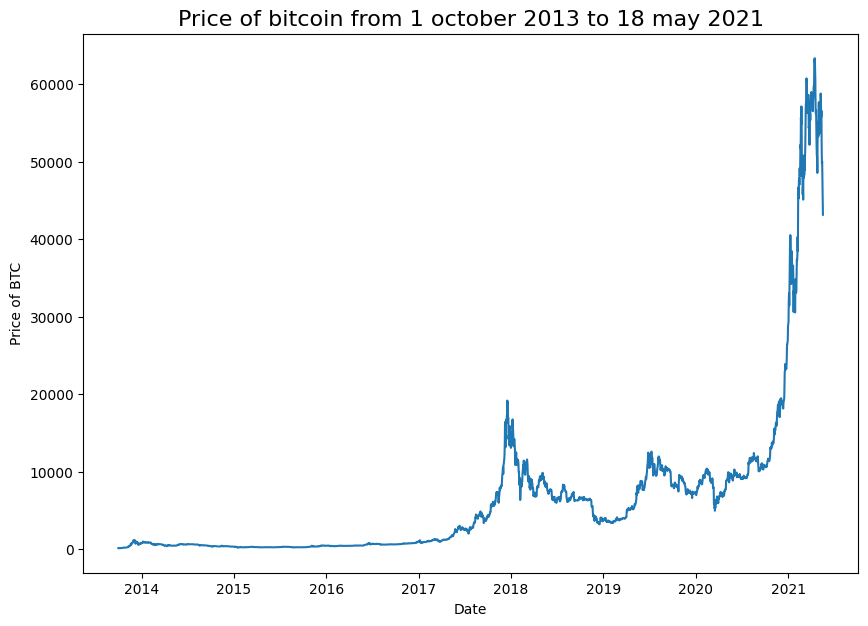

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

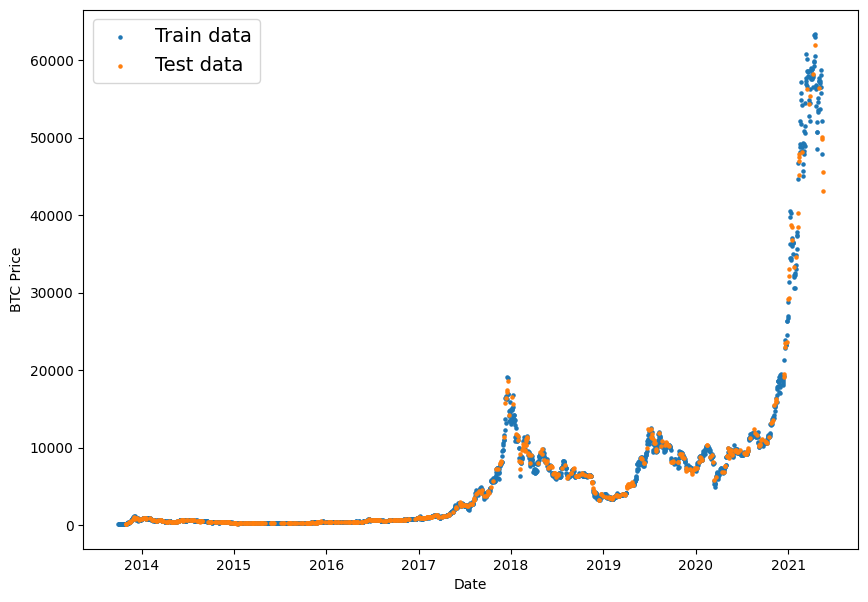

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

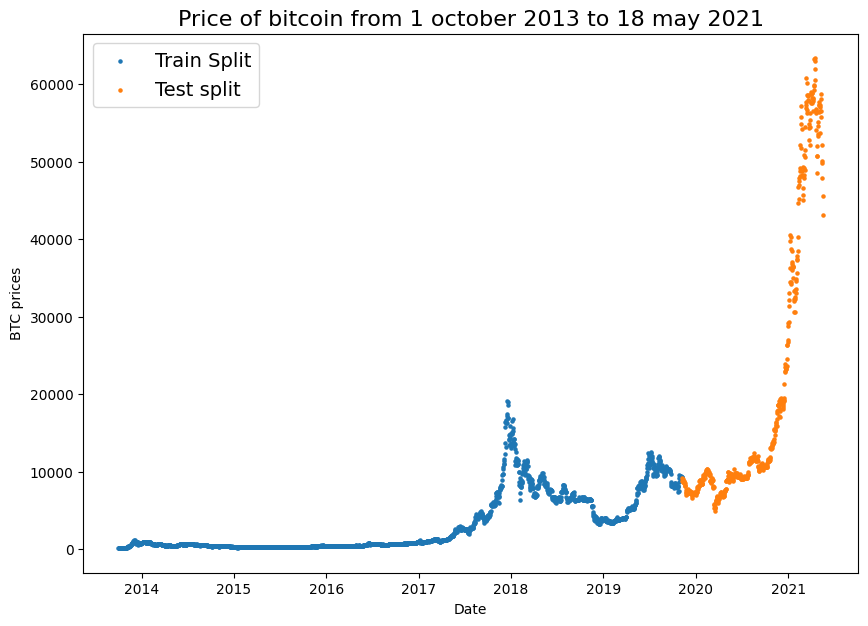

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


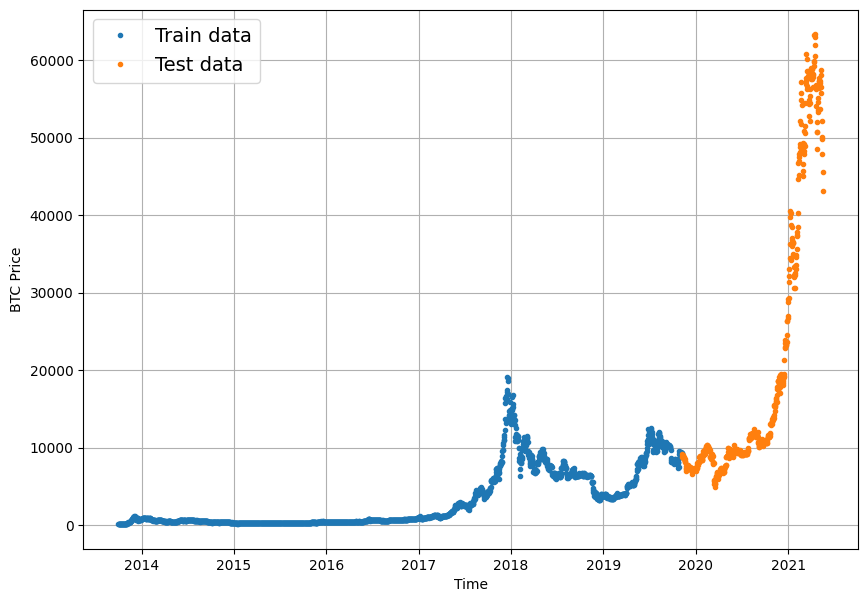

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

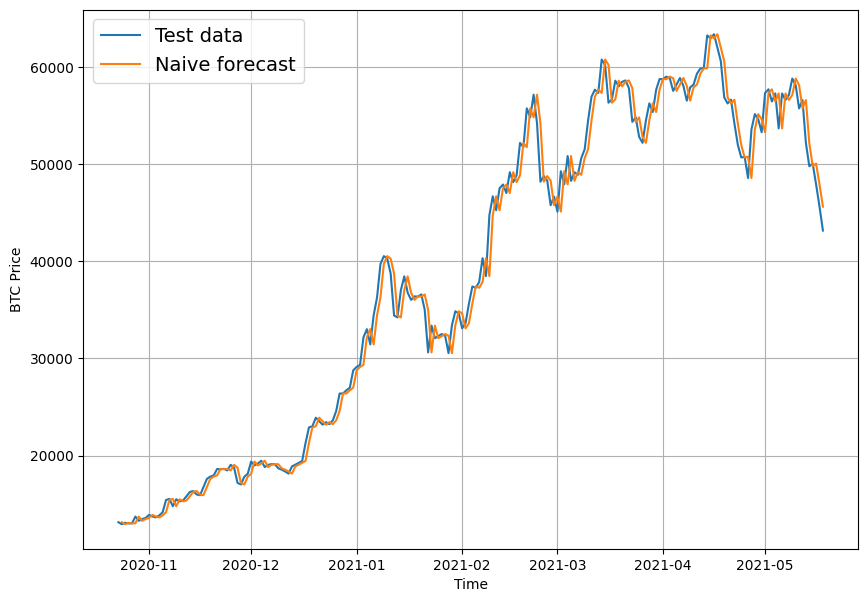

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1337.5370 - mae: 1337.5370

18/18 [==============================] - 7s 189ms/step - loss: 1337.5370 - mae: 1337.5370 - val_loss: 2471.8135 - val_mae: 2471.8135
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 402.2495 - mae: 402.2495

18/18 [==============================] - 1s 52ms/step - loss: 352.1647 - mae: 352.1647 - val_loss: 1761.3025 - val_mae: 1761.3025
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 217.9290 - mae: 217.9290

18/18 [==============================] - 1s 59ms/step - loss: 209.1990 - mae: 209.1990 - val_loss: 1304.7676 - val_mae: 1304.7676
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 194.4530 - mae: 194.4530

18/18 [==============================] - 1s 62ms/step - loss: 181.8693 - mae: 181.8693 - val_loss: 1038.9470 - val_mae: 1038.9470
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 185.1823 - mae: 185.1823

18/18 [==============================] - 1s 65ms/step - loss: 175.9294 - mae: 175.9294 - val_loss: 990.8042 - val_mae: 990.8042
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 170.3329 - mae: 170.3329

18/18 [==============================] - 1s 74ms/step - loss: 171.8739 - mae: 171.8739 - val_loss: 937.3696 - val_mae: 937.3696
Epoch 7/100
18/18 [==============================] - 0s 16ms/step - loss: 166.7169 - mae: 166.7169 - val_loss: 938.1524 - val_mae: 938.1524
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 163.0156 - mae: 163.0156

18/18 [==============================] - 2s 96ms/step - loss: 163.3154 - mae: 163.3154 - val_loss: 899.4871 - val_mae: 899.4871
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 162.5262 - mae: 162.5262 - val_loss: 941.2893 - val_mae: 941.2893
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 153.0868 - mae: 153.0868

18/18 [==============================] - 1s 76ms/step - loss: 157.3767 - mae: 157.3767 - val_loss: 853.4549 - val_mae: 853.4549
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 152.8303 - mae: 152.8303

18/18 [==============================] - 1s 35ms/step - loss: 151.7650 - mae: 151.7650 - val_loss: 842.8795 - val_mae: 842.8795
Epoch 12/100
13/18 [====================>.........] - ETA: 0s - loss: 147.6573 - mae: 147.6573

18/18 [==============================] - 1s 48ms/step - loss: 147.9032 - mae: 147.9032 - val_loss: 834.3312 - val_mae: 834.3312
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 147.7774 - mae: 147.7774 - val_loss: 942.7029 - val_mae: 942.7029
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 147.2486 - mae: 147.2486

18/18 [==============================] - 1s 46ms/step - loss: 147.2346 - mae: 147.2346 - val_loss: 814.8876 - val_mae: 814.8876
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 137.1989 - mae: 137.1989

18/18 [==============================] - 1s 43ms/step - loss: 140.0537 - mae: 140.0537 - val_loss: 769.4310 - val_mae: 769.4310
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 135.4914 - mae: 135.4914 - val_loss: 784.4377 - val_mae: 784.4377
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 133.3029 - mae: 133.3029 - val_loss: 809.6250 - val_mae: 809.6250
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 135.5871 - mae: 135.5871 - val_loss: 811.0153 - val_mae: 811.0152
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 130.0104 - mae: 130.0104 - val_loss: 790.7574 - val_mae: 790.7574
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 143.3609 - mae: 143.3609

18/18 [==============================] - 1s 30ms/step - loss: 128.8711 - mae: 128.8711 - val_loss: 715.4554 - val_mae: 715.4554
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 149.0836 - mae: 149.0836

18/18 [==============================] - 1s 30ms/step - loss: 130.5292 - mae: 130.5292 - val_loss: 694.0515 - val_mae: 694.0515
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 127.6176 - mae: 127.6176

18/18 [==============================] - 1s 32ms/step - loss: 123.2246 - mae: 123.2246 - val_loss: 689.5681 - val_mae: 689.5681
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 123.2545 - mae: 123.2545

18/18 [==============================] - 1s 31ms/step - loss: 123.2545 - mae: 123.2545 - val_loss: 670.8087 - val_mae: 670.8087
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 121.7133 - mae: 121.7133

18/18 [==============================] - 1s 32ms/step - loss: 120.2673 - mae: 120.2673 - val_loss: 652.3040 - val_mae: 652.3040
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 119.7281 - mae: 119.7281

18/18 [==============================] - 1s 30ms/step - loss: 119.7281 - mae: 119.7281 - val_loss: 644.0013 - val_mae: 644.0013
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 117.5119 - mae: 117.5119

18/18 [==============================] - 1s 32ms/step - loss: 117.5119 - mae: 117.5119 - val_loss: 635.9468 - val_mae: 635.9468
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6782 - mae: 117.6782 - val_loss: 638.0121 - val_mae: 638.0121
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 115.7417 - mae: 115.7417

18/18 [==============================] - 1s 30ms/step - loss: 115.7417 - mae: 115.7417 - val_loss: 623.4974 - val_mae: 623.4974
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5418 - mae: 114.5418 - val_loss: 627.7035 - val_mae: 627.7035
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 119.4835 - mae: 119.4835

18/18 [==============================] - 1s 32ms/step - loss: 119.8469 - mae: 119.8469 - val_loss: 613.4929 - val_mae: 613.4929
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4710 - mae: 118.4710 - val_loss: 637.7734 - val_mae: 637.7734
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7830 - mae: 113.7830 - val_loss: 631.6464 - val_mae: 631.6464
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 142.3470 - mae: 142.3470

18/18 [==============================] - 1s 47ms/step - loss: 112.6160 - mae: 112.6160 - val_loss: 607.9481 - val_mae: 607.9481
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 112.2096 - mae: 112.2096

18/18 [==============================] - 1s 32ms/step - loss: 112.2096 - mae: 112.2096 - val_loss: 603.6569 - val_mae: 603.6569
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5480 - mae: 111.5480 - val_loss: 614.9458 - val_mae: 614.9458
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 114.8762 - mae: 114.8762

18/18 [==============================] - 1s 32ms/step - loss: 114.7377 - mae: 114.7377 - val_loss: 593.3013 - val_mae: 593.3013
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7159 - mae: 112.7159 - val_loss: 599.1930 - val_mae: 599.1930
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 112.9399 - mae: 112.9399 - val_loss: 634.2938 - val_mae: 634.2938
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1077 - mae: 113.1077 - val_loss: 593.4370 - val_mae: 593.4370
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1919 - mae: 112.1919 - val_loss: 636.7879 - val_mae: 636.7879
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3374 - mae: 111.3374

18/18 [==============================] - 1s 30ms/step - loss: 110.6609 - mae: 110.6609 - val_loss: 584.2407 - val_mae: 584.2407
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7884 - mae: 113.7884 - val_loss: 628.6313 - val_mae: 628.6313
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9432 - mae: 115.9432 - val_loss: 656.9565 - val_mae: 656.9565
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0789 - mae: 118.0789 - val_loss: 625.2015 - val_mae: 625.2015
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0741 - mae: 112.0741 - val_loss: 589.0052 - val_mae: 589.0052
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 112.1439 - mae: 112.1439

18/18 [==============================] - 1s 30ms/step - loss: 112.1439 - mae: 112.1439 - val_loss: 582.1946 - val_mae: 582.1946
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 112.8162 - mae: 112.8162 - val_loss: 635.9461 - val_mae: 635.9461
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 110.4105 - mae: 110.4105 - val_loss: 596.1943 - val_mae: 596.1943
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 110.1453 - mae: 110.1453 - val_loss: 615.5839 - val_mae: 615.5839
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0977 - mae: 115.0977 - val_loss: 596.7961 - val_mae: 596.7961
Epoch 51/100
13/18 [====================>.........] - ETA: 0s - loss: 109.3302 - mae: 109.3302

18/18 [==============================] - 1s 44ms/step - loss: 109.5943 - mae: 109.5943 - val_loss: 582.0980 - val_mae: 582.0980
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 111.2377 - mae: 111.2377 - val_loss: 583.4142 - val_mae: 583.4142
Epoch 53/100
18/18 [==============================] - 0s 9ms/step - loss: 110.9336 - mae: 110.9336 - val_loss: 625.7329 - val_mae: 625.7329
Epoch 54/100
13/18 [====================>.........] - ETA: 0s - loss: 111.3466 - mae: 111.3466

18/18 [==============================] - 1s 44ms/step - loss: 113.1732 - mae: 113.1732 - val_loss: 577.3753 - val_mae: 577.3753
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1775 - mae: 126.1775

18/18 [==============================] - 1s 30ms/step - loss: 112.9124 - mae: 112.9124 - val_loss: 573.5408 - val_mae: 573.5408
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2611 - mae: 110.2611 - val_loss: 813.5189 - val_mae: 813.5189
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 132.5765 - mae: 132.5765 - val_loss: 719.9904 - val_mae: 719.9904
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3446 - mae: 115.3446 - val_loss: 584.6310 - val_mae: 584.6310
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8280 - mae: 109.8280 - val_loss: 573.6558 - val_mae: 573.6558
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4426 - mae: 107.4426 - val_loss: 587.3831 - val_mae: 587.3831
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 107.3048 - mae: 107.3048 - val_loss: 578.8500 - val_mae: 578.8500
Epoch 62/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 108.4362 - mae: 108.4362 - val_loss: 571.2418 - val_mae: 571.2418
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6741 - mae: 106.6741 - val_loss: 573.2704 - val_mae: 573.2704
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0380 - mae: 108.0380 - val_loss: 711.8392 - val_mae: 711.8392
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6678 - mae: 119.6678 - val_loss: 784.9704 - val_mae: 784.9704
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 131.7099 - mae: 131.7099 - val_loss: 682.8213 - val_mae: 682.8213
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1124 - mae: 120.1124 - val_loss: 571.7859 - val_mae: 571.7859
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6512 - mae: 111.6512 - val_loss: 604.9067 - val_mae: 604.9067
Epoch 72/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 107.2395 - mae: 107.2395 - val_loss: 570.5002 - val_mae: 570.5002
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7599 - mae: 107.7599 - val_loss: 571.4191 - val_mae: 571.4191
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6538 - mae: 108.6538 - val_loss: 575.8306 - val_mae: 575.8306
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 108.2009 - mae: 108.2009

18/18 [==============================] - 1s 31ms/step - loss: 108.2009 - mae: 108.2009 - val_loss: 569.5444 - val_mae: 569.5444
Epoch 78/100
16/18 [=========================>....] - ETA: 0s - loss: 111.1283 - mae: 111.1283

18/18 [==============================] - 1s 31ms/step - loss: 110.1277 - mae: 110.1277 - val_loss: 568.2008 - val_mae: 568.2008
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6964 - mae: 108.6964 - val_loss: 608.1811 - val_mae: 608.1811
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0113 - mae: 108.0113 - val_loss: 577.1095 - val_mae: 577.1095
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 105.7629 - mae: 105.7629 - val_loss: 568.7570 - val_mae: 568.7570
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8582 - mae: 113.8582 - val_loss: 573.9119 - val_mae: 573.9119
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5491 - mae: 112.5491 - val_loss: 669.3752 - val_mae: 669.3752
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9628 - mae: 111.9628 - val_loss: 576.3452 - val_mae: 576.3452
Epoch 85/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 108.2811 - mae: 108.2811 - val_loss: 566.7020 - val_mae: 566.7020
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0765 - mae: 111.0765 - val_loss: 574.1158 - val_mae: 574.1158
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5022 - mae: 105.5022 - val_loss: 628.0316 - val_mae: 628.0316
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4204 - mae: 109.4204 - val_loss: 606.0492 - val_mae: 606.0492
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 110.1546 - mae: 110.1546

18/18 [==============================] - 1s 31ms/step - loss: 110.1546 - mae: 110.1546 - val_loss: 565.9455 - val_mae: 565.9455
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6091 - mae: 113.6091 - val_loss: 600.1266 - val_mae: 600.1266
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2329 - mae: 109.2329 - val_loss: 584.3168 - val_mae: 584.3168
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 105.7506 - mae: 105.7506 - val_loss: 566.6623 - val_mae: 566.6623
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7564 - mae: 106.7564 - val_loss: 585.2756 - val_mae: 585.2756
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 106.5699 - mae: 106.5699 - val_loss: 583.1241 - val_mae: 583.1241
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1402 - mae: 106.1402 - val_loss: 569.2083 - val_mae: 569.2083
Epoch 99/100
 1/18 [>...........

18/18 [==============================] - 1s 31ms/step - loss: 106.2229 - mae: 106.2229 - val_loss: 565.5720 - val_mae: 565.5720
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0402 - mae: 108.0402 - val_loss: 588.0322 - val_mae: 588.0322


In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 588.0322 - mae: 588.0322


[588.0321655273438, 588.0321655273438]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.5720 - mae: 565.5720


[565.5719604492188, 565.5719604492188]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 2ms/step


array([[ 8862.334 ],
       [ 8784.057 ],
       [ 9049.39  ],
       [ 8786.164 ],
       [ 8743.718 ],
       [ 8768.538 ],
       [ 8675.989 ],
       [ 8522.013 ],
       [ 8480.017 ],
       [ 8532.089 ],
       [ 8265.385 ],
       [ 8124.838 ],
       [ 8088.9067],
       [ 7688.719 ],
       [ 7302.1577],
       [ 7298.564 ],
       [ 7094.782 ],
       [ 7182.6987],
       [ 7174.196 ],
       [ 7471.8022],
       [ 7444.287 ],
       [ 7699.5405],
       [ 7611.714 ],
       [ 7411.761 ],
       [ 7341.6606],
       [ 7324.4917],
       [ 7228.8423],
       [ 7374.8887],
       [ 7511.174 ],
       [ 7550.305 ],
       [ 7567.847 ],
       [ 7376.3247],
       [ 7247.5786],
       [ 7205.4233],
       [ 7195.648 ],
       [ 7236.576 ],
       [ 7120.5054],
       [ 7108.242 ],
       [ 6925.828 ],
       [ 6624.954 ],
       [ 7290.613 ],
       [ 7234.0264],
       [ 7149.4697],
       [ 7285.1025],
       [ 7264.102 ],
       [ 7193.6855],
       [ 7231.1724],
       [ 7226

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 565.57196,
 'mse': 1158997.1,
 'rmse': 1076.5673,
 'mape': 2.518034,
 'mase': 0.9935533}

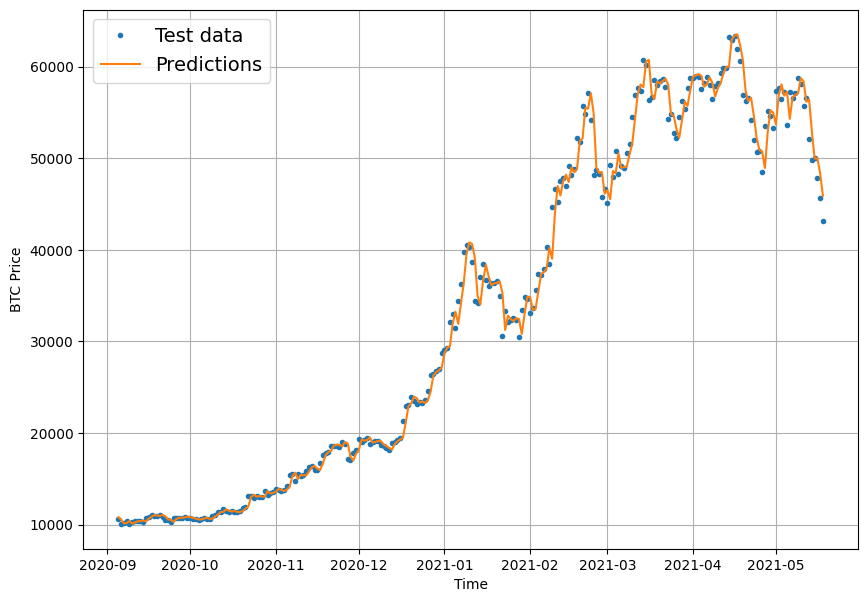

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [44]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [45]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [46]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 3918.1135 - mae: 3918.1135

18/18 [==============================] - 2s 41ms/step - loss: 1350.3420 - mae: 1350.3420 - val_loss: 5044.9971 - val_mae: 5044.9971
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 916.2621 - mae: 916.2621

18/18 [==============================] - 1s 31ms/step - loss: 397.7865 - mae: 397.7865 - val_loss: 1136.9585 - val_mae: 1136.9585
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 209.1891 - mae: 209.1891

18/18 [==============================] - 1s 30ms/step - loss: 212.6352 - mae: 212.6352 - val_loss: 1047.3236 - val_mae: 1047.3236
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 186.8696 - mae: 186.8696

18/18 [==============================] - 1s 32ms/step - loss: 188.8225 - mae: 188.8225 - val_loss: 980.5815 - val_mae: 980.5815
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 174.8817 - mae: 174.8817 - val_loss: 998.1974 - val_mae: 998.1974
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 177.9175 - mae: 177.9175

18/18 [==============================] - 1s 32ms/step - loss: 174.1809 - mae: 174.1809 - val_loss: 936.4483 - val_mae: 936.4483
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 151.7063 - mae: 151.7063

18/18 [==============================] - 1s 31ms/step - loss: 170.2810 - mae: 170.2810 - val_loss: 922.2256 - val_mae: 922.2256
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 177.5822 - mae: 177.5822 - val_loss: 1037.2347 - val_mae: 1037.2347
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 165.9074 - mae: 165.9074 - val_loss: 988.5645 - val_mae: 988.5645
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 165.4113 - mae: 165.4113 - val_loss: 968.7801 - val_mae: 968.7801
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 155.3484 - mae: 155.3484 - val_loss: 1085.4048 - val_mae: 1085.4048
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 155.3389 - mae: 155.3389

18/18 [==============================] - 1s 32ms/step - loss: 161.6917 - mae: 161.6917 - val_loss: 860.8768 - val_mae: 860.8768
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 151.1787 - mae: 151.1787

18/18 [==============================] - 1s 31ms/step - loss: 151.1787 - mae: 151.1787 - val_loss: 853.0283 - val_mae: 853.0283
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 155.3285 - mae: 155.3285 - val_loss: 1073.1608 - val_mae: 1073.1608
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 158.0582 - mae: 158.0582 - val_loss: 863.7111 - val_mae: 863.7111
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 158.1252 - mae: 158.1252 - val_loss: 894.8269 - val_mae: 894.8269
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 152.0252 - mae: 152.0252 - val_loss: 924.3174 - val_mae: 924.3174
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 158.8965 - mae: 158.8965 - val_loss: 944.4035 - val_mae: 944.4035
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 152.4998 - mae: 152.4998 - val_loss: 1078.4841 - val_mae: 1078.4841
Epoch 20/100
18/18 [========

18/18 [==============================] - 1s 33ms/step - loss: 171.5594 - mae: 171.5594 - val_loss: 838.0024 - val_mae: 838.0024
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 150.0470 - mae: 150.0470 - val_loss: 1034.0067 - val_mae: 1034.0067
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 147.6273 - mae: 147.6273

18/18 [==============================] - 1s 31ms/step - loss: 148.2499 - mae: 148.2499 - val_loss: 820.5935 - val_mae: 820.5935
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 154.1782 - mae: 154.1782 - val_loss: 872.5715 - val_mae: 872.5715
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 141.0296 - mae: 141.0296 - val_loss: 1096.1920 - val_mae: 1096.1920
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 167.7051 - mae: 167.7051 - val_loss: 888.1212 - val_mae: 888.1212
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 139.8103 - mae: 139.8103 - val_loss: 913.4530 - val_mae: 913.4530
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 143.0771 - mae: 143.0771 - val_loss: 892.1144 - val_mae: 892.1144
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 144.3020 - mae: 144.3020 - val_loss: 898.4734 - val_mae: 898.4734
Epoch 31/100
 1/18 [>.........

18/18 [==============================] - 1s 31ms/step - loss: 141.7211 - mae: 141.7211 - val_loss: 793.3507 - val_mae: 793.3507
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 144.0118 - mae: 144.0118 - val_loss: 994.7568 - val_mae: 994.7568
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 138.6519 - mae: 138.6519 - val_loss: 834.7056 - val_mae: 834.7056
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 144.5218 - mae: 144.5218

18/18 [==============================] - 1s 45ms/step - loss: 144.5085 - mae: 144.5085 - val_loss: 737.5635 - val_mae: 737.5635
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 132.6398 - mae: 132.6398

18/18 [==============================] - 1s 45ms/step - loss: 135.0773 - mae: 135.0773 - val_loss: 722.2620 - val_mae: 722.2620
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 137.8984 - mae: 137.8984 - val_loss: 937.1823 - val_mae: 937.1823
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 153.1045 - mae: 153.1045 - val_loss: 888.1831 - val_mae: 888.1831
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 163.2769 - mae: 163.2769 - val_loss: 983.9197 - val_mae: 983.9197
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 139.9995 - mae: 139.9995

18/18 [==============================] - 1s 31ms/step - loss: 145.2939 - mae: 145.2939 - val_loss: 712.5074 - val_mae: 712.5074
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 86.4769 - mae: 86.4769

18/18 [==============================] - 1s 47ms/step - loss: 132.8589 - mae: 132.8589 - val_loss: 702.4348 - val_mae: 702.4348
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 130.0699 - mae: 130.0699 - val_loss: 707.6474 - val_mae: 707.6474
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 128.6260 - mae: 128.6260 - val_loss: 723.0562 - val_mae: 723.0562
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 125.2727 - mae: 125.2727 - val_loss: 767.2622 - val_mae: 767.2622
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 138.6957 - mae: 138.6957 - val_loss: 743.7622 - val_mae: 743.7622
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 129.5110 - mae: 129.5110 - val_loss: 804.2096 - val_mae: 804.2096
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 132.1235 - mae: 132.1235 - val_loss: 965.7193 - val_mae: 965.7193
Epoch 47/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 143.9996 - mae: 143.9996 - val_loss: 698.6046 - val_mae: 698.6046
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 142.3912 - mae: 142.3912 - val_loss: 903.0607 - val_mae: 903.0607
Epoch 56/100
16/18 [=========================>....] - ETA: 0s - loss: 128.7152 - mae: 128.7152

18/18 [==============================] - 1s 31ms/step - loss: 128.4296 - mae: 128.4296 - val_loss: 677.3097 - val_mae: 677.3097
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 131.3269 - mae: 131.3269 - val_loss: 833.7080 - val_mae: 833.7080
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 139.7821 - mae: 139.7821 - val_loss: 682.1558 - val_mae: 682.1558
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 167.2119 - mae: 167.2119

18/18 [==============================] - 1s 32ms/step - loss: 166.5005 - mae: 166.5005 - val_loss: 666.6888 - val_mae: 666.6888
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 128.1006 - mae: 128.1006 - val_loss: 684.9962 - val_mae: 684.9962
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 113.4522 - mae: 113.4522

18/18 [==============================] - 1s 32ms/step - loss: 129.9912 - mae: 129.9912 - val_loss: 657.6877 - val_mae: 657.6877
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 127.5167 - mae: 127.5167 - val_loss: 979.3864 - val_mae: 979.3864
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 149.8649 - mae: 149.8649 - val_loss: 709.7279 - val_mae: 709.7279
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 129.5817 - mae: 129.5817 - val_loss: 879.7897 - val_mae: 879.7897
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 132.4209 - mae: 132.4209 - val_loss: 697.5367 - val_mae: 697.5367
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 131.2327 - mae: 131.2327 - val_loss: 805.0890 - val_mae: 805.0890
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 129.8257 - mae: 129.8257

18/18 [==============================] - 1s 32ms/step - loss: 134.4235 - mae: 134.4235 - val_loss: 654.2662 - val_mae: 654.2662
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 126.2526 - mae: 126.2526 - val_loss: 691.2281 - val_mae: 691.2281
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 133.6001 - mae: 133.6001 - val_loss: 784.4152 - val_mae: 784.4152
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2363 - mae: 124.2363 - val_loss: 675.3812 - val_mae: 675.3812
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 125.3761 - mae: 125.3761 - val_loss: 752.1701 - val_mae: 752.1701
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 128.9535 - mae: 128.9535 - val_loss: 741.0859 - val_mae: 741.0859
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0297 - mae: 118.0297 - val_loss: 761.9066 - val_mae: 761.9066
Epoch 74/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 143.2645 - mae: 143.2645 - val_loss: 636.2340 - val_mae: 636.2340
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 93.3603 - mae: 93.3603

18/18 [==============================] - 1s 31ms/step - loss: 155.7725 - mae: 155.7725 - val_loss: 634.0861 - val_mae: 634.0861
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2144 - mae: 125.2144 - val_loss: 1120.4518 - val_mae: 1120.4518
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 172.3727 - mae: 172.3727 - val_loss: 1511.7054 - val_mae: 1511.7054
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 292.2651 - mae: 292.2651

18/18 [==============================] - 1s 30ms/step - loss: 148.4287 - mae: 148.4287 - val_loss: 632.0645 - val_mae: 632.0645
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 128.0213 - mae: 128.0213 - val_loss: 874.6246 - val_mae: 874.6246
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 136.2025 - mae: 136.2025 - val_loss: 1112.9869 - val_mae: 1112.9869
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 150.3860 - mae: 150.3860 - val_loss: 1321.1611 - val_mae: 1321.1611
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 166.7127 - mae: 166.7127 - val_loss: 906.0576 - val_mae: 906.0576
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 146.4560 - mae: 146.4560 - val_loss: 640.1009 - val_mae: 640.1009
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 130.6745 - mae: 130.6745 - val_loss: 771.4309 - val_mae: 771.4309
Epoch 86/100
18/18 [========

18/18 [==============================] - 1s 47ms/step - loss: 131.8526 - mae: 131.8526 - val_loss: 631.2266 - val_mae: 631.2266
Epoch 97/100
13/18 [====================>.........] - ETA: 0s - loss: 119.2927 - mae: 119.2927

18/18 [==============================] - 1s 47ms/step - loss: 116.4420 - mae: 116.4420 - val_loss: 630.4080 - val_mae: 630.4080
Epoch 98/100
13/18 [====================>.........] - ETA: 0s - loss: 121.8836 - mae: 121.8836

18/18 [==============================] - 1s 32ms/step - loss: 118.7159 - mae: 118.7159 - val_loss: 625.4946 - val_mae: 625.4946
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2406 - mae: 112.2406 - val_loss: 724.7218 - val_mae: 724.7218
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 136.1882 - mae: 136.1882 - val_loss: 645.8922 - val_mae: 645.8922


In [47]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 625.4946 - mae: 625.4946


[625.49462890625, 625.49462890625]

In [48]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 625.4947,
 'mse': 1340384.8,
 'rmse': 1157.7499,
 'mape': 2.8692532,
 'mase': 1.0933709}

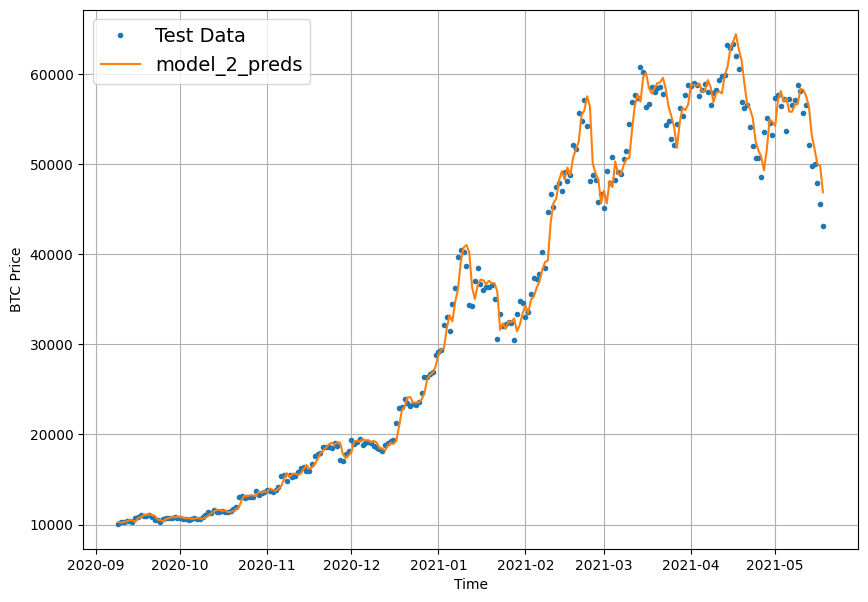

In [50]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [51]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [52]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [53]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1632.9478 - mae: 1632.9478 

18/18 [==============================] - 2s 42ms/step - loss: 1568.0493 - mae: 1568.0493 - val_loss: 2666.9646 - val_mae: 2666.9646
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 569.6813 - mae: 569.6813 - val_loss: 2871.3513 - val_mae: 2871.3513
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 457.6217 - mae: 457.6217

18/18 [==============================] - 1s 32ms/step - loss: 457.4331 - mae: 457.4331 - val_loss: 2218.2905 - val_mae: 2218.2905
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 404.6800 - mae: 404.6800

18/18 [==============================] - 1s 61ms/step - loss: 404.6800 - mae: 404.6800 - val_loss: 2100.3657 - val_mae: 2100.3657
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 369.8279 - mae: 369.8279

18/18 [==============================] - 1s 47ms/step - loss: 373.8062 - mae: 373.8062 - val_loss: 2096.1648 - val_mae: 2096.1648
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 354.7794 - mae: 354.7794

18/18 [==============================] - 1s 49ms/step - loss: 351.4183 - mae: 351.4183 - val_loss: 1867.8165 - val_mae: 1867.8165
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 334.3888 - mae: 334.3888

18/18 [==============================] - 1s 33ms/step - loss: 328.3893 - mae: 328.3893 - val_loss: 1715.4724 - val_mae: 1715.4724
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 287.7548 - mae: 287.7548

18/18 [==============================] - 1s 30ms/step - loss: 316.0286 - mae: 316.0286 - val_loss: 1660.8967 - val_mae: 1660.8967
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 304.5391 - mae: 304.5391 - val_loss: 1873.0963 - val_mae: 1873.0963
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 270.1145 - mae: 270.1145

18/18 [==============================] - 1s 30ms/step - loss: 313.1464 - mae: 313.1464 - val_loss: 1579.4108 - val_mae: 1579.4108
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 287.8942 - mae: 287.8942

18/18 [==============================] - 1s 30ms/step - loss: 289.4507 - mae: 289.4507 - val_loss: 1527.5981 - val_mae: 1527.5981
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 282.4544 - mae: 282.4544 - val_loss: 1631.0729 - val_mae: 1631.0729
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 279.5817 - mae: 279.5817

18/18 [==============================] - 1s 32ms/step - loss: 279.5817 - mae: 279.5817 - val_loss: 1511.8502 - val_mae: 1511.8502
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 266.2362 - mae: 266.2362

18/18 [==============================] - 1s 33ms/step - loss: 277.1317 - mae: 277.1317 - val_loss: 1487.0002 - val_mae: 1487.0002
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 274.4700 - mae: 274.4700 - val_loss: 1611.0488 - val_mae: 1611.0488
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 272.3566 - mae: 272.3566 - val_loss: 1532.3418 - val_mae: 1532.3418
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 268.9476 - mae: 268.9476 - val_loss: 1583.2450 - val_mae: 1583.2450
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 264.4789 - mae: 264.4789 - val_loss: 1557.2206 - val_mae: 1557.2206
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 261.6670 - mae: 261.6670 - val_loss: 1608.1403 - val_mae: 1608.1403
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 266.4870 - mae: 266.4870 - val_loss: 1488.8000 - val_mae: 1488.8000
Epoch 21/100
 1/18

18/18 [==============================] - 1s 31ms/step - loss: 257.4565 - mae: 257.4565 - val_loss: 1425.9579 - val_mae: 1425.9579
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 255.1715 - mae: 255.1715 - val_loss: 1441.9852 - val_mae: 1441.9852
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 272.7824 - mae: 272.7824

18/18 [==============================] - 1s 31ms/step - loss: 263.4176 - mae: 263.4176 - val_loss: 1368.1227 - val_mae: 1368.1227
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 305.5030 - mae: 305.5030

18/18 [==============================] - 1s 31ms/step - loss: 262.2448 - mae: 262.2448 - val_loss: 1355.9889 - val_mae: 1355.9889
Epoch 25/100
18/18 [==============================] - 0s 15ms/step - loss: 252.0400 - mae: 252.0400 - val_loss: 1621.8799 - val_mae: 1621.8799
Epoch 26/100
18/18 [==============================] - 0s 19ms/step - loss: 252.3064 - mae: 252.3064 - val_loss: 1416.6382 - val_mae: 1416.6382
Epoch 27/100
18/18 [==============================] - 0s 15ms/step - loss: 244.9584 - mae: 244.9584 - val_loss: 1369.8779 - val_mae: 1369.8779
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 243.5813 - mae: 243.5813 - val_loss: 1439.7334 - val_mae: 1439.7334
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 246.8468 - mae: 246.8468

18/18 [==============================] - 1s 63ms/step - loss: 246.8468 - mae: 246.8468 - val_loss: 1329.6951 - val_mae: 1329.6951
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 247.5213 - mae: 247.5213 - val_loss: 1343.4987 - val_mae: 1343.4987
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 199.7030 - mae: 199.7030

18/18 [==============================] - 1s 57ms/step - loss: 239.4422 - mae: 239.4422 - val_loss: 1321.4408 - val_mae: 1321.4408
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 241.4973 - mae: 241.4973

18/18 [==============================] - 1s 37ms/step - loss: 239.3046 - mae: 239.3046 - val_loss: 1308.0138 - val_mae: 1308.0138
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 243.1498 - mae: 243.1498 - val_loss: 1348.3918 - val_mae: 1348.3918
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 239.1279 - mae: 239.1279 - val_loss: 1385.5248 - val_mae: 1385.5248
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 245.3032 - mae: 245.3032 - val_loss: 1376.0881 - val_mae: 1376.0881
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 237.9476 - mae: 237.9476 - val_loss: 1353.8099 - val_mae: 1353.8099
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 251.0698 - mae: 251.0698 - val_loss: 1357.7539 - val_mae: 1357.7539
Epoch 38/100
18/18 [==============================] - 0s 8ms/step - loss: 237.2759 - mae: 237.2759 - val_loss: 1308.4392 - val_mae: 1308.4392
Epoch 39/100
18/18

18/18 [==============================] - 1s 46ms/step - loss: 238.2825 - mae: 238.2825 - val_loss: 1289.3019 - val_mae: 1289.3019
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 232.5213 - mae: 232.5213 - val_loss: 1290.7816 - val_mae: 1290.7816
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 237.1479 - mae: 237.1479

18/18 [==============================] - 1s 44ms/step - loss: 233.6210 - mae: 233.6210 - val_loss: 1270.4845 - val_mae: 1270.4845
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 233.0011 - mae: 233.0011 - val_loss: 1401.9521 - val_mae: 1401.9521
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 240.3287 - mae: 240.3287 - val_loss: 1300.4437 - val_mae: 1300.4437
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 240.8678 - mae: 240.8678 - val_loss: 1451.9387 - val_mae: 1451.9387
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 236.8594 - mae: 236.8594 - val_loss: 1350.0020 - val_mae: 1350.0020
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 252.3093 - mae: 252.3093 - val_loss: 1389.4144 - val_mae: 1389.4144
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 238.8412 - mae: 238.8412 - val_loss: 1319.7423 - val_mae: 1319.7423
Epoch 51/100
18/18

18/18 [==============================] - 1s 49ms/step - loss: 228.6364 - mae: 228.6364 - val_loss: 1255.3774 - val_mae: 1255.3774
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 230.1199 - mae: 230.1199 - val_loss: 1261.1084 - val_mae: 1261.1084
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 226.7006 - mae: 226.7006 - val_loss: 1285.7610 - val_mae: 1285.7610
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 226.3943 - mae: 226.3943 - val_loss: 1370.7039 - val_mae: 1370.7039
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 235.8922 - mae: 235.8922 - val_loss: 1297.7732 - val_mae: 1297.7732
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 233.7398 - mae: 233.7398 - val_loss: 1259.3035 - val_mae: 1259.3035
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 228.9453 - mae: 228.9453 - val_loss: 1261.2374 - val_mae: 1261.2374
Epoch 60/100
18/18

18/18 [==============================] - 1s 31ms/step - loss: 231.9546 - mae: 231.9546 - val_loss: 1248.6729 - val_mae: 1248.6729
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 231.2774 - mae: 231.2774 - val_loss: 1449.2434 - val_mae: 1449.2434
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 265.1143 - mae: 265.1143

18/18 [==============================] - 1s 31ms/step - loss: 232.9607 - mae: 232.9607 - val_loss: 1227.5244 - val_mae: 1227.5244
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 229.8520 - mae: 229.8520 - val_loss: 1342.2869 - val_mae: 1342.2869
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 227.1509 - mae: 227.1509 - val_loss: 1645.0275 - val_mae: 1645.0275
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 242.7326 - mae: 242.7326 - val_loss: 1315.3387 - val_mae: 1315.3387
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 233.7367 - mae: 233.7367 - val_loss: 1251.2736 - val_mae: 1251.2736
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 228.6879 - mae: 228.6879 - val_loss: 1570.2897 - val_mae: 1570.2897
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 283.4834 - mae: 283.4834

18/18 [==============================] - 1s 32ms/step - loss: 230.4072 - mae: 230.4072 - val_loss: 1217.2006 - val_mae: 1217.2006
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 225.2827 - mae: 225.2827 - val_loss: 1252.3925 - val_mae: 1252.3925
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 226.4222 - mae: 226.4222 - val_loss: 1222.8673 - val_mae: 1222.8673
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 223.1115 - mae: 223.1115 - val_loss: 1256.4625 - val_mae: 1256.4625
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 224.5511 - mae: 224.5511 - val_loss: 1332.1147 - val_mae: 1332.1147
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 224.0907 - mae: 224.0907 - val_loss: 1397.1259 - val_mae: 1397.1259
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 228.4792 - mae: 228.4792 - val_loss: 1263.7162 - val_mae: 1263.7162
Epoch 77/100
18/18

In [54]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1217.2006 - mae: 1217.2006


[1217.2005615234375, 1217.2005615234375]

In [55]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [56]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [57]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  647.77734 ,   427.9266  ,   290.47406 ,   442.09906 ,
          438.61328 ,   502.45166 ,   531.8213  ,   586.3385  ,
          502.7265  ,   573.83075 ,   752.1125  ,   875.64606 ,
          871.68134 ,   893.1372  ,   718.8201  ,   228.33957 ,
          140.5489  ,   246.34822 ,   263.31787 ,   272.99637 ,
          178.70898 ,   161.42307 ,   345.46707 ,   320.61844 ,
          200.65633 ,   115.11286 ,   111.26876 ,    96.75272 ,
          132.4218  ,   158.81348 ,   293.46793 ,   339.20062 ,
          283.6882  ,   319.42154 ,   271.82172 ,   266.88394 ,
          330.75174 ,   259.7269  ,   247.81201 ,   269.238   ,
          505.827   ,   123.04743 ,    33.40151 ,    71.581055,
           58.65925 ,   115.69176 ,    76.70947 ,    92.63741 ,
          144.79485 ,   156.01004 ,   111.83663 ,   105.817314,
          196.23152 ,   172.57178 ,   245.24435 ,   374.44775 ,
          593.4154  ,   549.3179  ,   480.27002 ,   565.07385 ,
          407.51498 ,   216.24805

# Make our evaluation function work for larger horizons

In [58]:
model_2_results["mae"].ndim

0

In [59]:
model_3_results["mae"].ndim

1

In [60]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1217.2006 - mae: 1217.2006


[1217.2005615234375, 1217.2005615234375]

In [61]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1217.2006

In [62]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [63]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1217.2006,
 'mse': 5180284.0,
 'rmse': 1398.1409,
 'mape': 5.481663,
 'mase': 2.1659405}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [64]:
test_labels.shape

(551, 7)

In [65]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9440.992 ,  9169.076 ,  8933.411 ,  9068.693 ,  8992.961 ,
        8965.028 ,  8898.015 ,  8803.356 ,  8542.812 ,  8386.671 ,
        8411.987 ,  8393.529 ,  8249.934 ,  8192.623 ,  7986.5156,
        7560.694 ,  7415.6577,  7226.235 ,  7171.204 ,  7199.2   ,
        7450.668 ,  7505.1025,  7730.81  ,  7704.5166,  7608.594 ,
        7463.2837,  7413.1553,  7317.4844,  7385.918 ,  7441.868 ,
        7555.945 ,  7539.176 ,  7419.435 ,  7361.492 ,  7313.2534,
        7312.1484,  7372.1875,  7244.337 ,  7219.308 ,  7015.542 ,
        6727.978 ,  7080.586 ,  7213.984 ,  7210.587 ,  7283.539 ,
        7358.5454,  7315.029 ,  7342.933 ,  7276.415 ,  7306.678 ,
        7232.362 ,  7226.6304,  7415.9106,  7351.019 ,  7295.664 ,
        7301.964 ,  7064.5938,  7222.4385,  7405.2583,  7427.145 ,
        7642.2896,  8005.7827,  8075.664 ,  8058.018 ,  8075.435 ,
        8169.4546,  8335.307 ,  8176.078 ,  8625.937 ,  8960.97  ,
        8904.4

In [66]:
model_3_preds.shape

(551, 7)

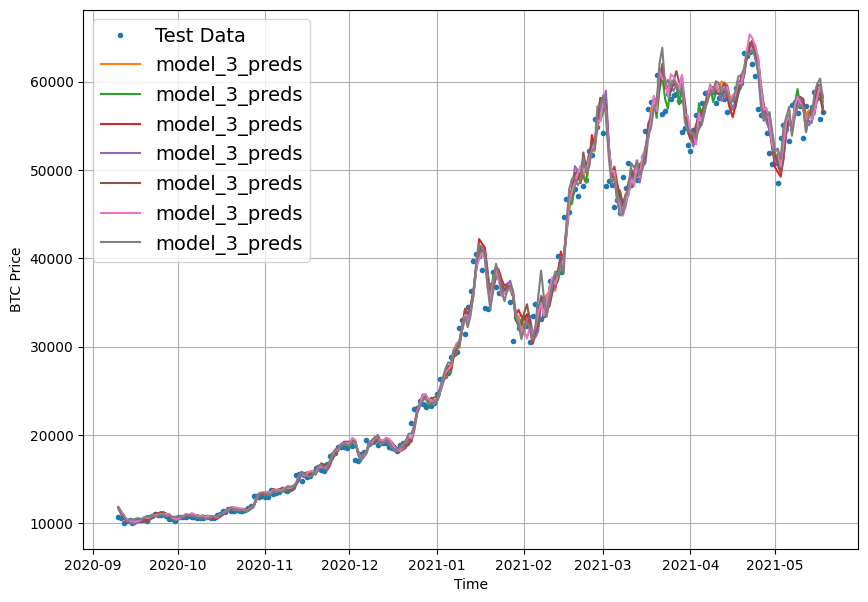

In [67]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

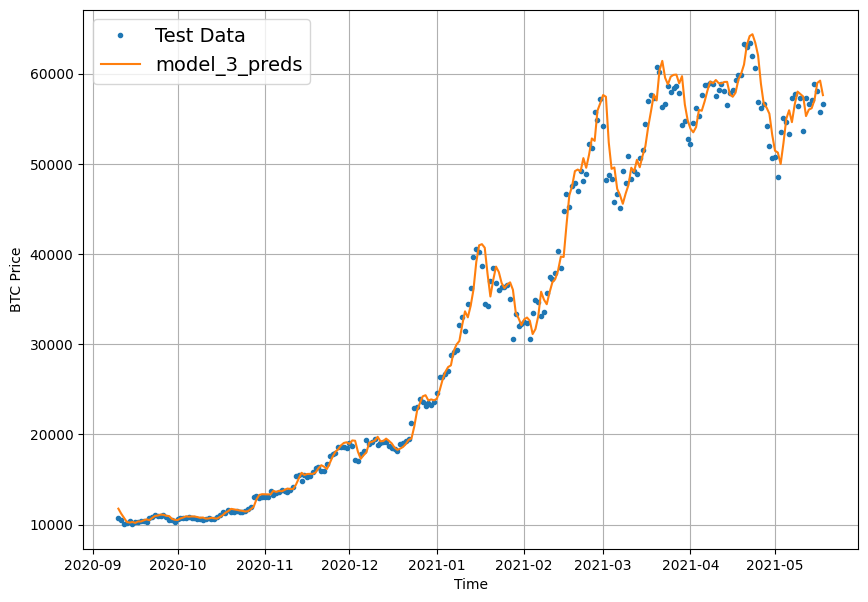

In [68]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

In [69]:
#

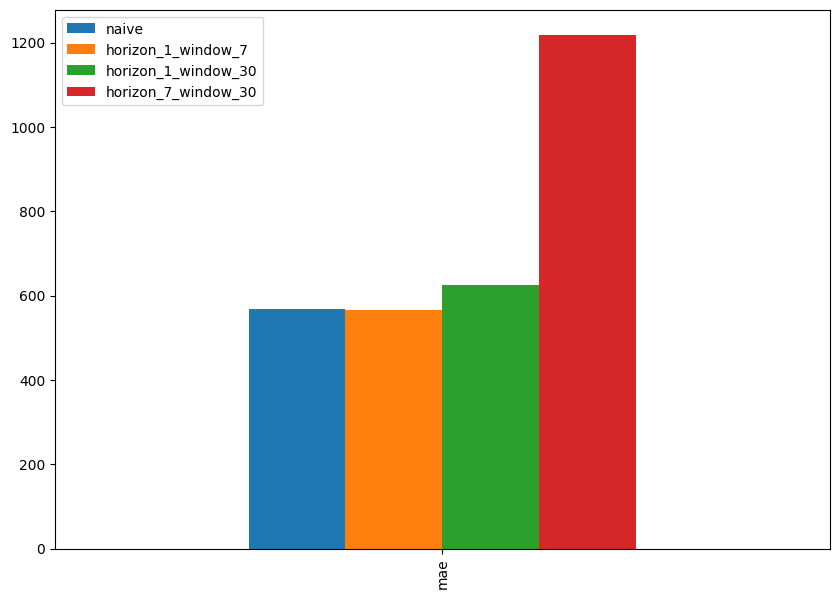

In [70]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [71]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [72]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [73]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [74]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [75]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [76]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [77]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [78]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1787.7042

18/18 [==============================] - 3s 58ms/step - loss: 1787.7042 - val_loss: 1467.5415
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 317.5033 - val_loss: 1547.3615
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 221.7333

18/18 [==============================] - 1s 41ms/step - loss: 221.7333 - val_loss: 1062.1552
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 193.3367

18/18 [==============================] - 1s 43ms/step - loss: 191.6558 - val_loss: 1029.8878
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 186.3323

18/18 [==============================] - 1s 41ms/step - loss: 184.3297 - val_loss: 1023.9653
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 179.8549

18/18 [==============================] - 1s 43ms/step - loss: 181.7003 - val_loss: 1021.4852
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 185.4058

18/18 [==============================] - 1s 70ms/step - loss: 180.6812 - val_loss: 990.3659
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 172.9148

18/18 [==============================] - 1s 62ms/step - loss: 175.8886 - val_loss: 984.8541
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 173.6020 - val_loss: 998.3256
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 166.5377

18/18 [==============================] - 1s 54ms/step - loss: 171.2876 - val_loss: 960.0171
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 173.9804

18/18 [==============================] - 1s 43ms/step - loss: 168.5138 - val_loss: 936.0283
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 168.8304 - val_loss: 966.3083
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 164.1525 - val_loss: 937.0995
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 158.2006

18/18 [==============================] - 1s 45ms/step - loss: 161.0148 - val_loss: 908.6011
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 160.0625 - val_loss: 939.1151
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 155.3307

18/18 [==============================] - 1s 46ms/step - loss: 156.3226 - val_loss: 865.1555
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 153.4200 - val_loss: 890.3289
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 158.5909

18/18 [==============================] - 1s 42ms/step - loss: 151.9449 - val_loss: 846.2108
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 148.2280 - val_loss: 864.9695
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 152.3329

18/18 [==============================] - 1s 42ms/step - loss: 147.9521 - val_loss: 818.9444
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 144.7794

18/18 [==============================] - 1s 42ms/step - loss: 145.8921 - val_loss: 795.9282
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 143.9438 - val_loss: 796.1055
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 140.4314 - val_loss: 803.4711
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 143.7956

18/18 [==============================] - 1s 42ms/step - loss: 142.1578 - val_loss: 792.0544
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 142.1189

18/18 [==============================] - 1s 42ms/step - loss: 138.4158 - val_loss: 762.2791
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 135.0343

18/18 [==============================] - 1s 43ms/step - loss: 135.4585 - val_loss: 754.1426
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 135.5296

18/18 [==============================] - 1s 42ms/step - loss: 136.3332 - val_loss: 747.7153
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 134.1669

18/18 [==============================] - 1s 66ms/step - loss: 132.8770 - val_loss: 729.3767
Epoch 29/100
14/18 [======================>.......] - ETA: 0s - loss: 131.1061

18/18 [==============================] - 1s 54ms/step - loss: 131.1630 - val_loss: 725.6424
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 133.1494 - val_loss: 787.6349
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 138.7688 - val_loss: 803.4385
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 133.5627 - val_loss: 748.3189
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 131.1200

18/18 [==============================] - 1s 62ms/step - loss: 130.8191 - val_loss: 714.4593
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 135.3628

18/18 [==============================] - 1s 47ms/step - loss: 127.8705 - val_loss: 702.7866
Epoch 35/100
13/18 [====================>.........] - ETA: 0s - loss: 130.5376

18/18 [==============================] - 1s 44ms/step - loss: 126.5342 - val_loss: 698.4219
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 130.4160 - val_loss: 732.6069
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 125.3491

18/18 [==============================] - 1s 40ms/step - loss: 125.3491 - val_loss: 672.0282
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 123.4042

18/18 [==============================] - 1s 41ms/step - loss: 123.2121 - val_loss: 666.5253
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 124.0791 - val_loss: 700.2085
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 122.2004

18/18 [==============================] - 1s 42ms/step - loss: 122.1499 - val_loss: 662.3534
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 123.2000

18/18 [==============================] - 1s 42ms/step - loss: 122.5387 - val_loss: 653.2864
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 125.5841

18/18 [==============================] - 1s 42ms/step - loss: 124.4371 - val_loss: 650.3008
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7970 - val_loss: 653.9077
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 120.6168 - val_loss: 658.7012
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 122.0775

18/18 [==============================] - 1s 40ms/step - loss: 122.0775 - val_loss: 642.1035
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 119.2548 - val_loss: 650.7035
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 123.9607 - val_loss: 732.0474
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 120.9625 - val_loss: 701.1614
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 121.5754

18/18 [==============================] - 1s 42ms/step - loss: 120.9723 - val_loss: 631.0594
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0043

18/18 [==============================] - 1s 66ms/step - loss: 116.9889 - val_loss: 627.8448
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2023 - val_loss: 630.0533
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 121.8964

18/18 [==============================] - 1s 43ms/step - loss: 119.2799 - val_loss: 626.9152
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7389 - val_loss: 632.9106
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 119.0546 - val_loss: 711.1132
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6423

18/18 [==============================] - 1s 44ms/step - loss: 120.0216 - val_loss: 624.4091
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 120.1634 - val_loss: 818.7267
Epoch 57/100
12/18 [===================>..........] - ETA: 0s - loss: 150.4659

18/18 [==============================] - 1s 66ms/step - loss: 140.9138 - val_loss: 624.0064
Epoch 58/100
18/18 [==============================] - 0s 12ms/step - loss: 119.6770 - val_loss: 629.8253
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 113.0359

18/18 [==============================] - 1s 79ms/step - loss: 114.3283 - val_loss: 612.1210
Epoch 60/100
18/18 [==============================] - 0s 11ms/step - loss: 114.1471 - val_loss: 616.9929
Epoch 61/100
18/18 [==============================] - ETA: 0s - loss: 114.1854

18/18 [==============================] - 1s 61ms/step - loss: 114.1854 - val_loss: 611.4176
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6683 - val_loss: 621.8547
Epoch 63/100
11/18 [=================>............] - ETA: 0s - loss: 121.9084

18/18 [==============================] - 1s 47ms/step - loss: 116.4278 - val_loss: 607.0266
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3167 - val_loss: 651.2761
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 117.1821

18/18 [==============================] - 1s 41ms/step - loss: 117.1821 - val_loss: 600.3576
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 113.3954

18/18 [==============================] - 1s 42ms/step - loss: 113.1308 - val_loss: 600.2666
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2481 - val_loss: 686.8137
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7123 - val_loss: 711.1040
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 128.1962 - val_loss: 676.2426
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8581 - val_loss: 600.4320
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5762 - val_loss: 615.3129
Epoch 72/100
13/18 [====================>.........] - ETA: 0s - loss: 112.9733

18/18 [==============================] - 1s 43ms/step - loss: 112.7152 - val_loss: 594.5214
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 112.8860 - val_loss: 615.5359
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 112.4930

18/18 [==============================] - 1s 42ms/step - loss: 112.5588 - val_loss: 592.2460
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2989 - val_loss: 605.5798
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 113.4552

18/18 [==============================] - 1s 43ms/step - loss: 113.0828 - val_loss: 591.2419
Epoch 77/100
13/18 [====================>.........] - ETA: 0s - loss: 116.1913

18/18 [==============================] - 1s 44ms/step - loss: 112.7454 - val_loss: 588.5004
Epoch 78/100
16/18 [=========================>....] - ETA: 0s - loss: 112.7929

18/18 [==============================] - 1s 65ms/step - loss: 112.2446 - val_loss: 587.7248
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3128 - val_loss: 624.7387
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 113.6587

18/18 [==============================] - 1s 44ms/step - loss: 113.1320 - val_loss: 585.7063
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 109.8337

18/18 [==============================] - 1s 42ms/step - loss: 110.3322 - val_loss: 585.2000
Epoch 82/100
15/18 [========================>.....] - ETA: 0s - loss: 117.5176

18/18 [==============================] - 1s 59ms/step - loss: 116.6678 - val_loss: 584.7698
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 114.2912 - val_loss: 643.0883
Epoch 84/100
10/18 [===============>..............] - ETA: 0s - loss: 116.2389

18/18 [==============================] - 1s 64ms/step - loss: 115.0245 - val_loss: 584.4690
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2543 - val_loss: 588.5884
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0822 - val_loss: 627.5568
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2250 - val_loss: 586.3447
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0326 - val_loss: 608.8381
Epoch 89/100
17/18 [===========================>..] - ETA: 0s - loss: 110.2658

18/18 [==============================] - 1s 42ms/step - loss: 111.7142 - val_loss: 579.0031
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9255 - val_loss: 683.2644
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9425 - val_loss: 622.8637
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3620 - val_loss: 582.5435
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3098 - val_loss: 656.2820
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6886 - val_loss: 580.6502
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8245 - val_loss: 590.2382
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0581 - val_loss: 599.6577
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3236 - val_loss: 597.8190
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 10

18/18 [==============================] - 1s 41ms/step - loss: 109.7816 - val_loss: 577.7995
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0653 - val_loss: 630.0227


In [79]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 630.0227


630.022705078125

In [81]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 577.7995


577.7994995117188

In [82]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [83]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 2ms/step


((556, 1), TensorShape([556]))

In [84]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 577.7995,
 'mse': 1204917.5,
 'rmse': 1097.6874,
 'mape': 2.5874567,
 'mase': 1.0150337}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [85]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [86]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 142ms/step - loss: 2818.7002 - val_loss: 13608.5254
Epoch 2/100
18/18 [==============================] - 2s 107ms/step - loss: 1611.2372 - val_loss: 4776.6284
Epoch 3/100
18/18 [==============================] - 2s 125ms/step - loss: 375.4780 - val_loss: 1575.8501
Epoch 4/100
18/18 [==============================] - 3s 170ms/step - loss: 227.9978 - val_loss: 1154.7533
Epoch 5/100
18/18 [==============================] - 2s 107ms/step - loss: 193.0249 - val_loss: 1118.5797
Epoch 6/100
18/18 [==============================] - 2s 133ms/step - loss: 187.1967 - val_loss: 1045.6271
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 187.3951 - val_loss: 1056.8368
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 185.2784 - val_loss: 1063.9167
Epoch 9/100
18/18 [==============================] - 2s 103ms/step - loss: 187.3213 - val_loss: 1006.8768
Epoch 10/100
18/18 [===========================

In [87]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 583.5964


583.5963745117188

In [88]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 2ms/step


(556, 1)

In [89]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 583.59625,
 'mse': 1228757.1,
 'rmse': 1108.4932,
 'mape': 2.6414256,
 'mase': 1.0252169}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.

# Make a multivariate time series dataset

Before we add a feature to our time series data , what is a feature we can use?

Bizim şu anki datamız open system bir data yani bunun grafiğini her şey değiştirebilir. Bu yüzden biz buna dışarıdan her türlü feature ekleyebiliriz.

One feature we could add is whether or not Elong Trust tweeted on that day.
* day 1 - 0 (this number is  how many tweeted on this day)
* day 2 - 1
* day 3 - 0

What is a better feature to use?

How about the bitcoin halving events?(miningte kazdıgın her blok icin verilen bitcoin ödülünü yarıya düşürme eventi)(daha az , daha değerli olduğu için bu event olduktan sonra bitcoinin değeri artıyor.)

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [90]:
# Lets make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [91]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [92]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward wont be in our dataset (our dataset starts from 01 October 2013 )
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates (we should add these values as our data's dates type like 2013-10-04)
block_reward_2_datetime = np.datetime64("2012-11-28")  # Sondaki 64 dtype ı belirtiyor.
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

# Bizim bi range oluşturmamız gerek bu tarihlerle. mesela block_reward_2_datetime ile block_reward_3_datetime arasındaki tarihlerde rewardımız 25 olacak. Kalanları da aynı bu şekilde ayarlayacağız.

In [93]:
 bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [94]:
 bitcoin_prices.index[ -1 : ]

DatetimeIndex(['2021-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [95]:
# Create date ranges of where spesific block_reward values should be
block_reward_2_days =  (block_reward_3_datetime - bitcoin_prices.index[0]).days # Because we set up our block_reward_2_datetime object as np.datetime , we can use this with the indexes on our Bitcoin prices DataFrame. bitcoin_prices.index[0] bizim datamızdaki ilk tarihi verecek. Datamızdaki ilk tarihten itibaren alıyoruz çünkü bizim datamızda 2012 verileri yok. İki datetime ı birbirinden çıakrdığımız için .days attribute kullanabiliyoruz.
block_reward_2_days

1012

In [96]:
block_reward_3_days = ( block_reward_4_datetime - bitcoin_prices.index[0] ).days
block_reward_2_days , block_reward_3_days
# ilk günden 1012. güne kadar  reward 25 , 1012. günden 2041. güne kadar reward 12 , 2421 den sonraki günler için reward 6.25 olacak

(1012, 2421)

In [97]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()  # bitcoin_prices dataframe imizin aynısını kopyaladık.
bitcoin_prices_block["block_reward"] = None    # block_reward columnu ekledik en başta boş olarak ekliyoruz sonrasında dolduruyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [98]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[ : block_reward_2_days , -1] = block_reward_2  # Index eklemek istediğimiz icin iloc kullanıyoruz. Son columnda block_rewardlarımız oldugu icin ve biz bunları doldurmak istedigimiz icin column kısmına -1 diyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [99]:
bitcoin_prices_block.iloc[ block_reward_2_days : block_reward_3_days , -1 ] = block_reward_3
bitcoin_prices_block.iloc[ block_reward_3_days :  , -1 ] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

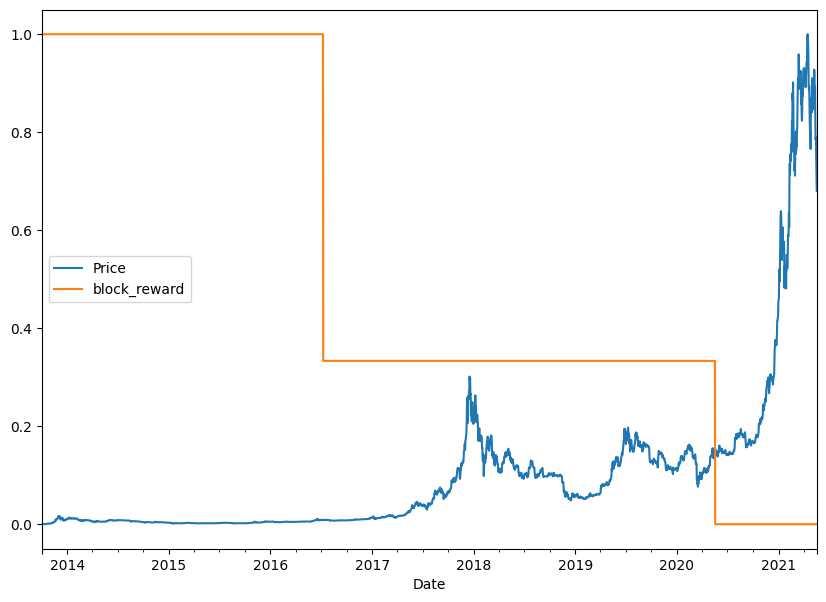

In [100]:
# Plot the block reward vs price over time.
# minmax_scale bütün değerleri 0 la 1 arasına sıkıştırıyor.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale( bitcoin_prices_block[ [ "Price" , "block_reward" ] ] ) ,
    columns = bitcoin_prices_block.columns ,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot(figsize = (10 , 7))

# Making a windowed dataset with pandas

Previously , we have turned our univariate time series into windowed dataset using the helper function above.

However , since we have got multivariate data , these functions wont work.

Not to worry , we can use pandas.DataFrame.shift() method to window our multivariate data.

In [101]:
# Setup dataset parameters
HORIZON = 1
WINDOW_SIZE = 7

In [102]:
# Make a copy of the bitcoin historcal data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift( periods = i + 1 )

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
